# Exploratory Data Analysis On "Online Diwali Sales"  

##  Step 1 :-  Import The Required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 2 :-  Import The Dataset 

In [2]:
df = pd.read_csv("/kaggle/input/online-diwali-sales-eda/Diwali Sales Data.csv", encoding = "unicode_escape") 
# encoding is used to avoid encoding error

In [3]:
# to check the numbers of rows & cloumns in the given raw data
df.shape

(11251, 15)

In [4]:
# to take the top five rows & columns of the dataset
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


##  Step 3 :-  Data Cleaning 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Now we have to drop the cloumns which are unnecessary 
df.drop(['Status','unnamed1'],axis = 1, inplace = True)

In [7]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.shape

(11251, 13)

In [10]:
# drop the null values
df.dropna(inplace=True)

In [11]:
df.shape

(11239, 13)

In [12]:
# Change the datatype
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int64')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
# Statistical Information 
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
df[['Amount','Age','Orders']].describe()

,Amount,Age,Orders
count,11239.000000,11239.000000,11239.000000
mean,9453.610553,35.410357,2.489634
std,5222.355168,12.753866,1.114967
min,188.000000,12.000000,1.000000
25%,5443.000000,27.000000,2.000000
50%,8109.000000,33.000000,2.000000
75%,12675.000000,43.000000,3.000000
max,23952.000000,92.000000,4.000000


## Step 4 :-  Exploratory Data Analysis (EDA)

### 1. Gender 

<Axes: xlabel='Gender', ylabel='count'>

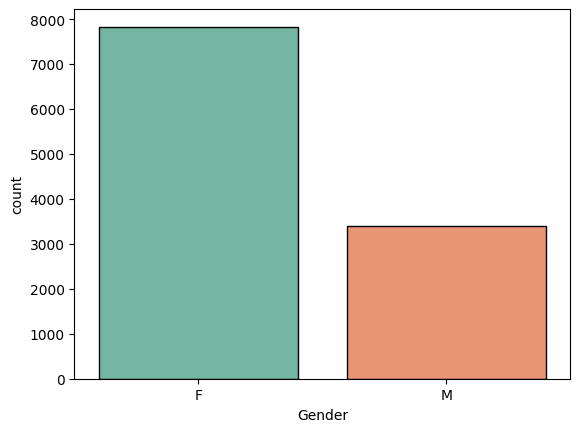

In [16]:
sns.countplot(x = 'Gender', data = df, palette = "Set2", edgecolor = "Black")

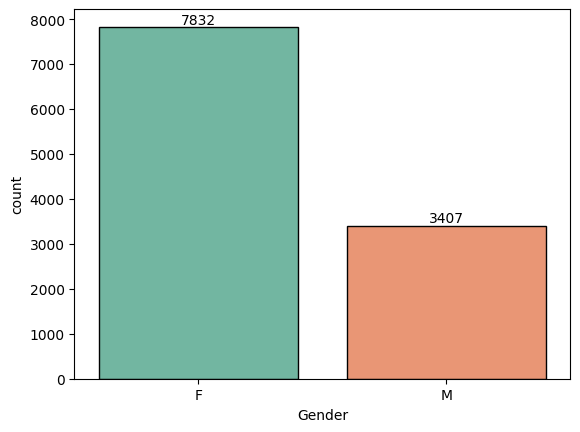

In [17]:
ax = sns.countplot(x = 'Gender', data = df, palette = "Set2", edgecolor = "Black")
for bars in ax.containers:
    ax.bar_label(bars)

In [18]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

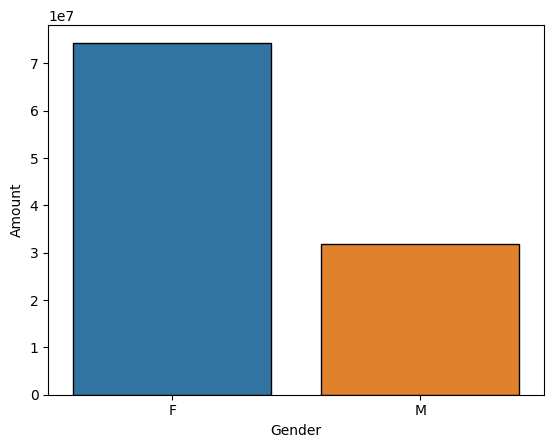

In [19]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x='Gender', y='Amount', data = sales_gen , edgecolor = "black")

### 2. Age Group 

<Axes: xlabel='Age Group', ylabel='count'>

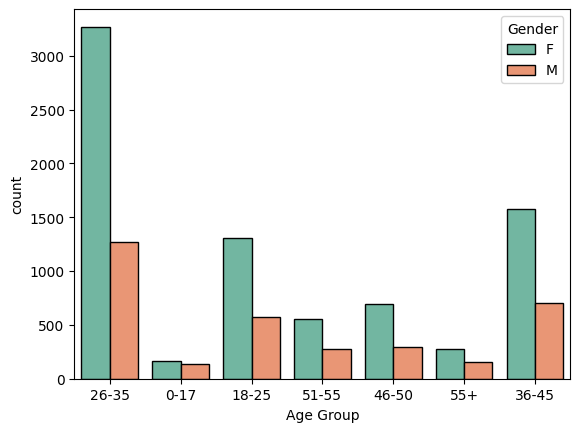

In [20]:
sns.countplot(x = 'Age Group', data = df , hue = 'Gender', palette = "Set2", edgecolor = "Black")

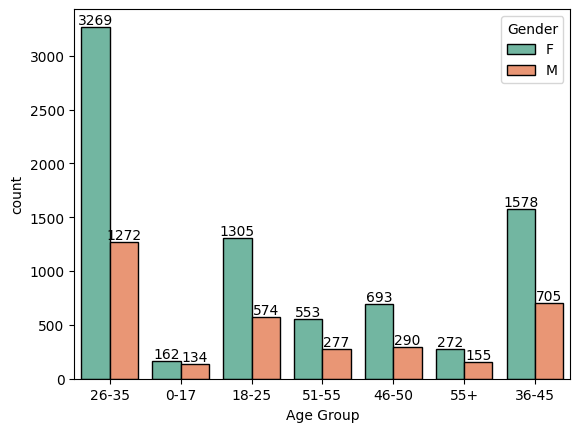

In [21]:
ax = sns.countplot(x = 'Age Group', data = df, hue = 'Gender', palette = "Set2", edgecolor = "Black")
for bars in ax.containers:
    ax.bar_label(bars)

In [22]:
df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

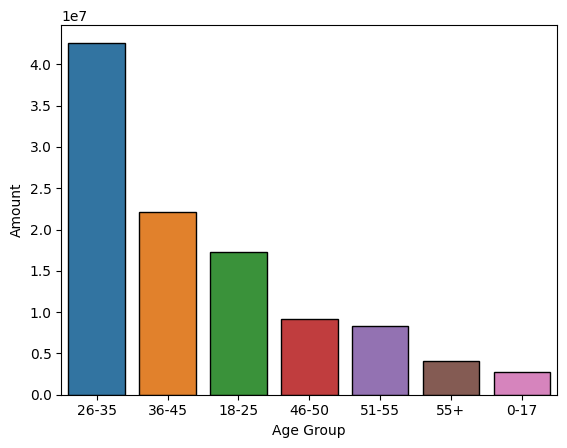

In [23]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x='Age Group', y='Amount', data = sales_age , edgecolor = "black")

### 3. State 

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

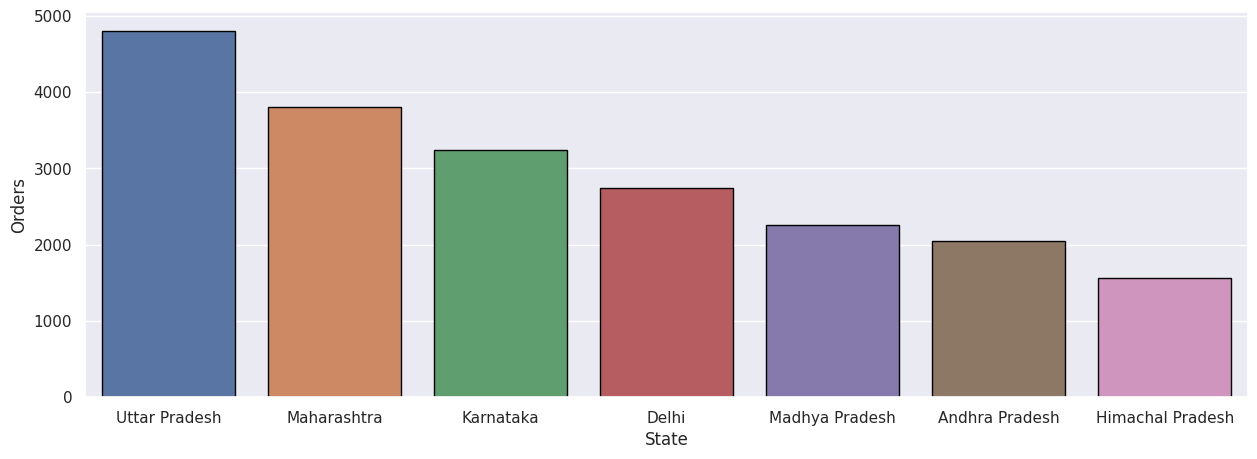

In [25]:
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(7)
sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(x='State', y='Orders', data = sales_state , edgecolor = "black")

<Axes: xlabel='State', ylabel='Amount'>

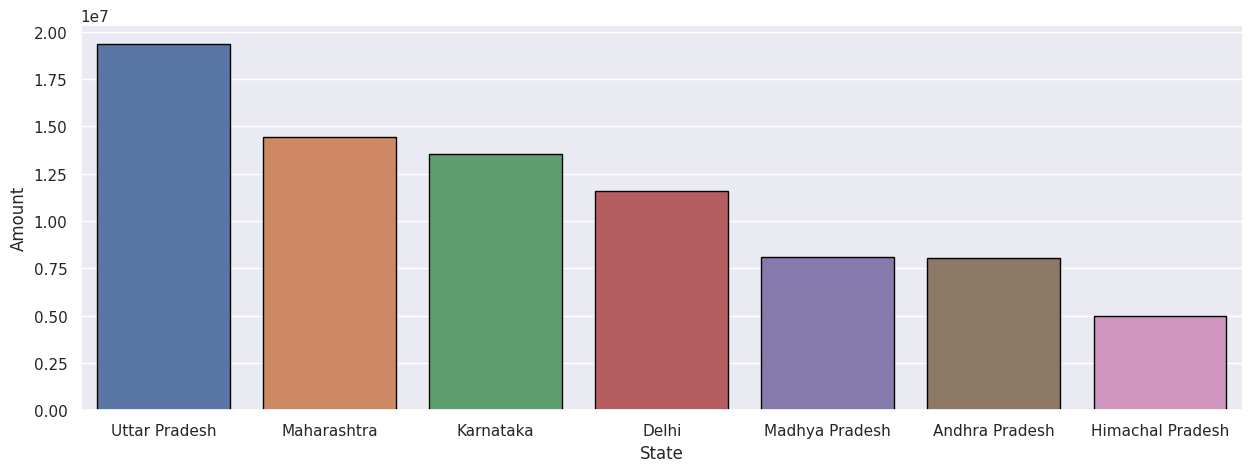

In [26]:
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(7)
sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(x='State', y='Amount', data = sales_state , edgecolor = "black")

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### 4. Marital_Status 

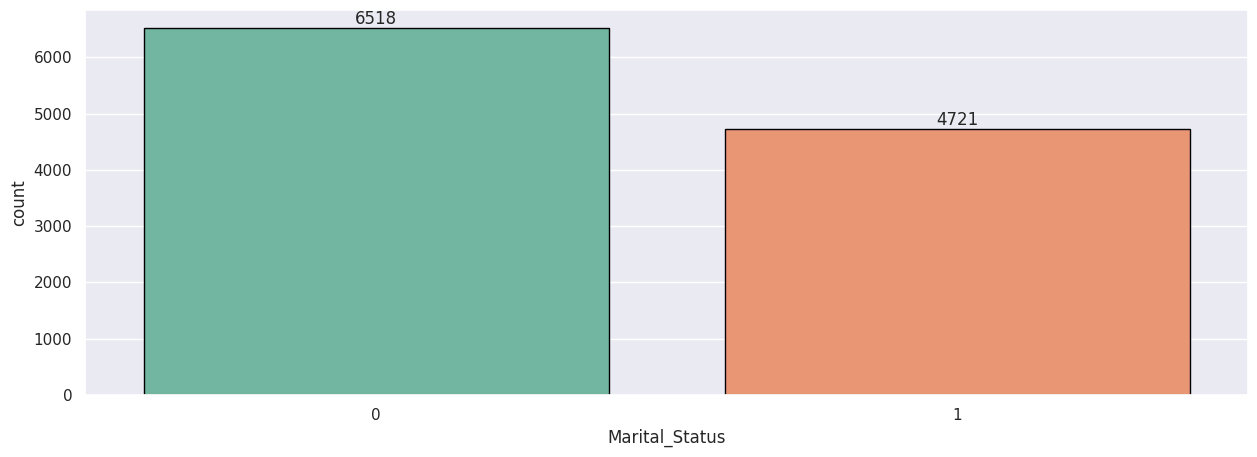

In [28]:
ax = sns.countplot(x = 'Marital_Status', data = df, palette = "Set2", edgecolor = "Black")
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc = {'figure.figsize':(7,5)})

<Axes: xlabel='Marital_Status', ylabel='Orders'>

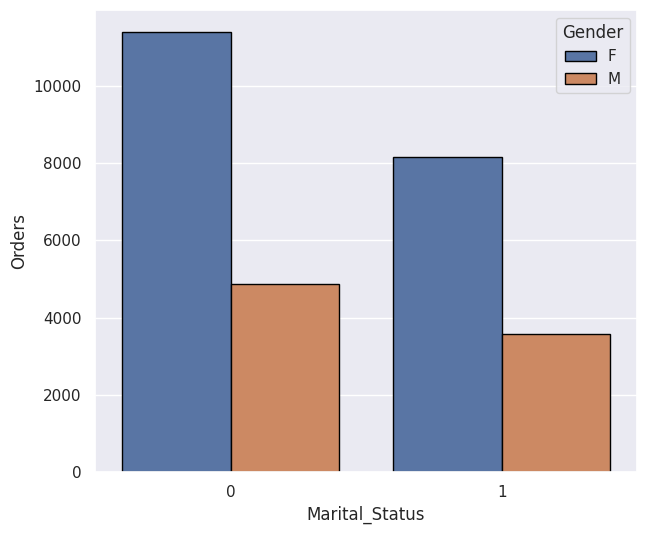

In [29]:
sales_state = df.groupby(['Marital_Status','Gender'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(7)
sns.set(rc = {'figure.figsize':(7,6)})
sns.barplot(x='Marital_Status', y='Orders', data = sales_state , hue = 'Gender', edgecolor = "black")

<Axes: xlabel='Marital_Status', ylabel='Amount'>

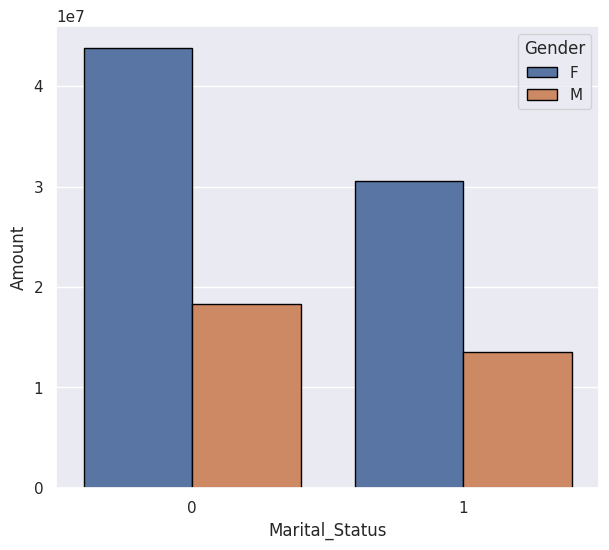

In [30]:
sales_state = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(7)
sns.set(rc = {'figure.figsize':(7,6)})
sns.barplot(x='Marital_Status', y='Amount', data = sales_state , hue = 'Gender', edgecolor = "black")

### 5. Occupation 

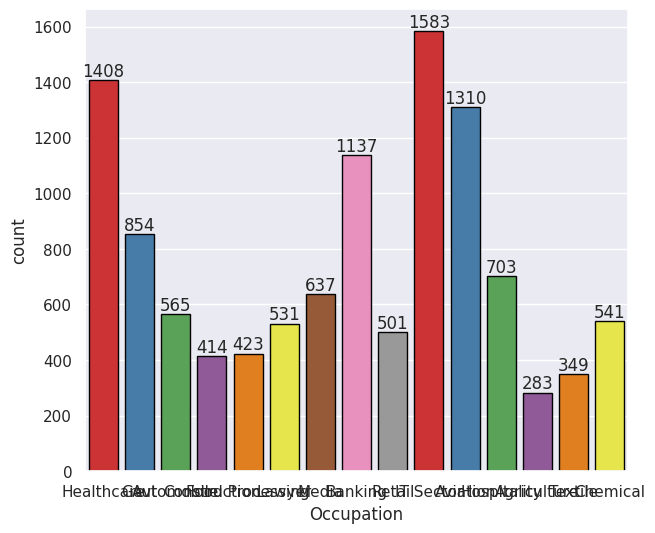

In [31]:
ax = sns.countplot(x = 'Occupation', data = df, palette = "Set1", edgecolor = "Black")
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc = {'figure.figsize':(25,5)})

<Axes: xlabel='Occupation', ylabel='Amount'>

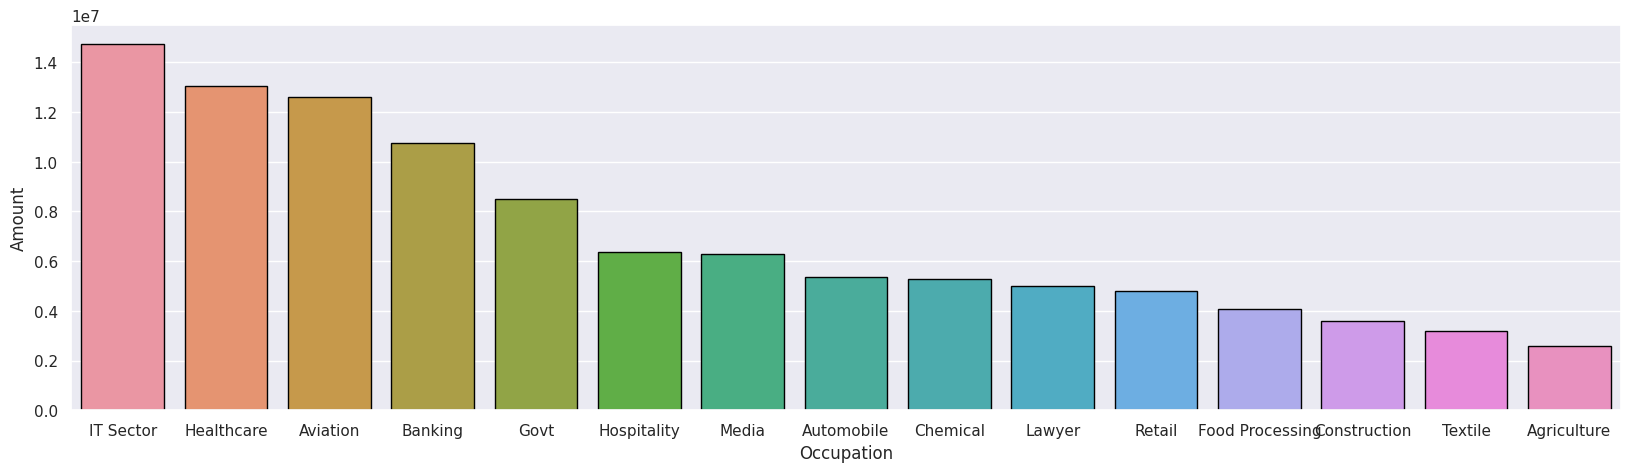

In [32]:
sales_state = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(x='Occupation', y='Amount', data = sales_state , edgecolor = "black")

### 6. Product_Category 

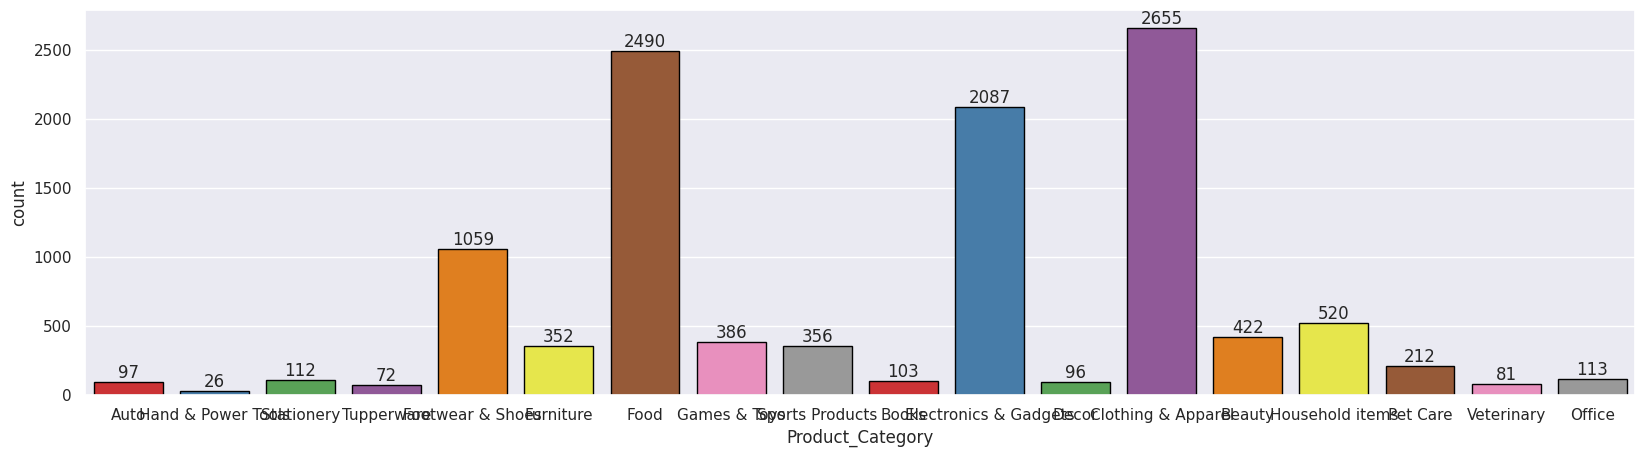

In [33]:
ax = sns.countplot(x = 'Product_Category', data = df, palette = "Set1", edgecolor = "Black")
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc = {'figure.figsize':(25,7)})

<Axes: xlabel='Product_Category', ylabel='Amount'>

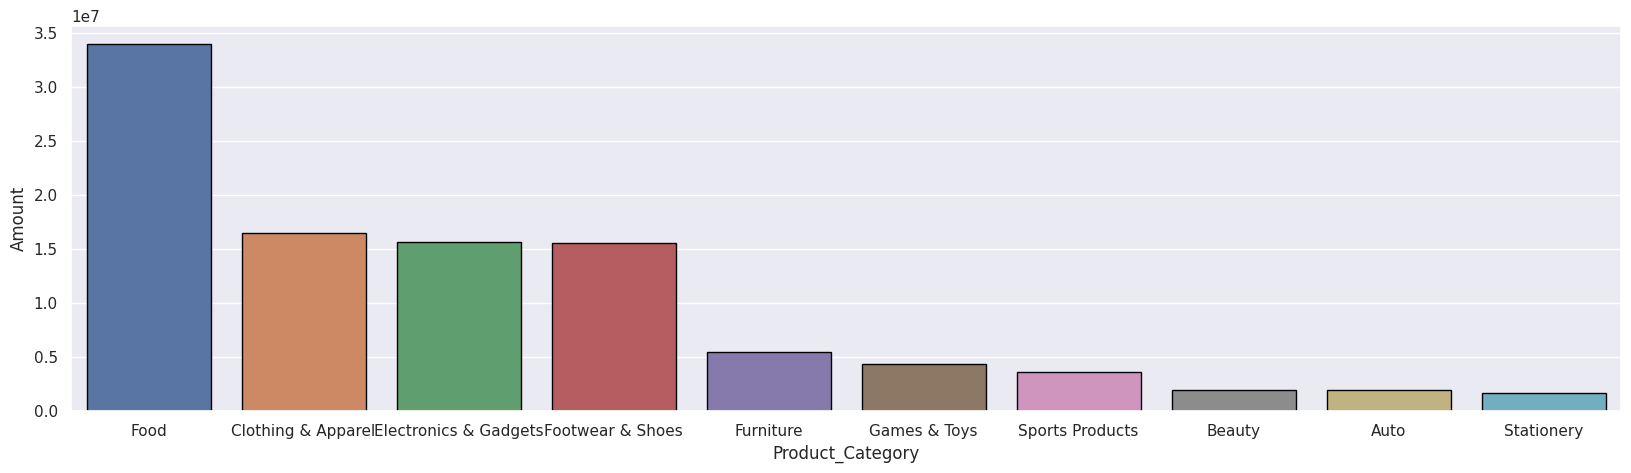

In [34]:
sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(x='Product_Category', y='Amount', data = sales_state , edgecolor = "black")

In [35]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### 7. Product_ID 

<Axes: xlabel='Product_ID', ylabel='Orders'>

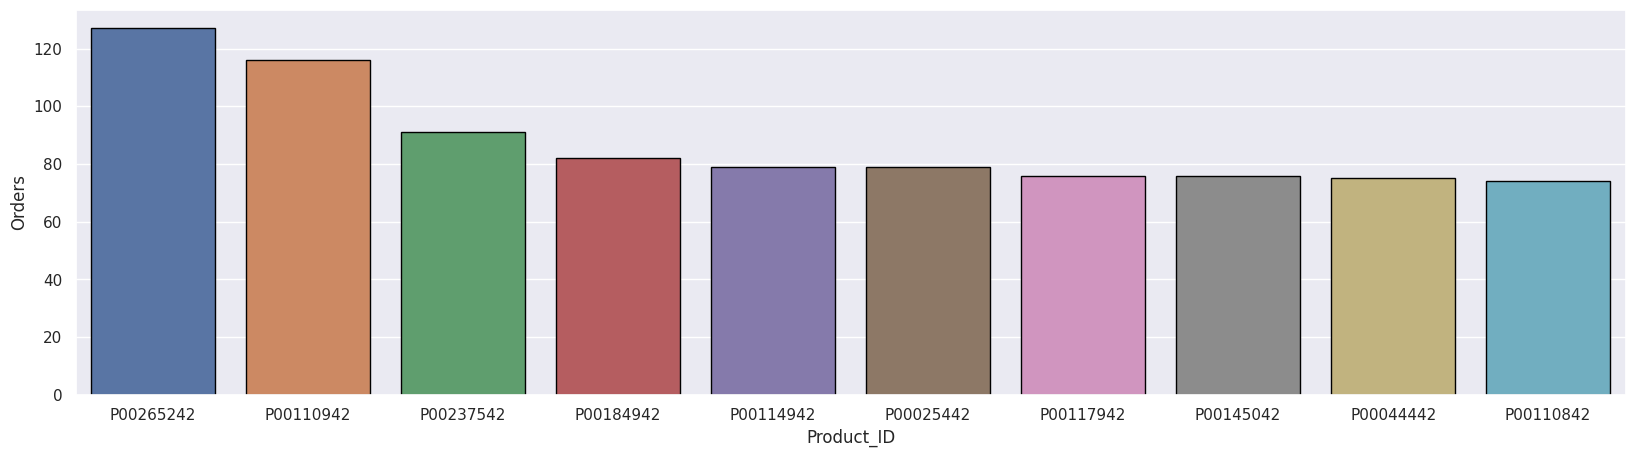

In [36]:
sales_state = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(x='Product_ID', y='Orders', data = sales_state , edgecolor = "black")

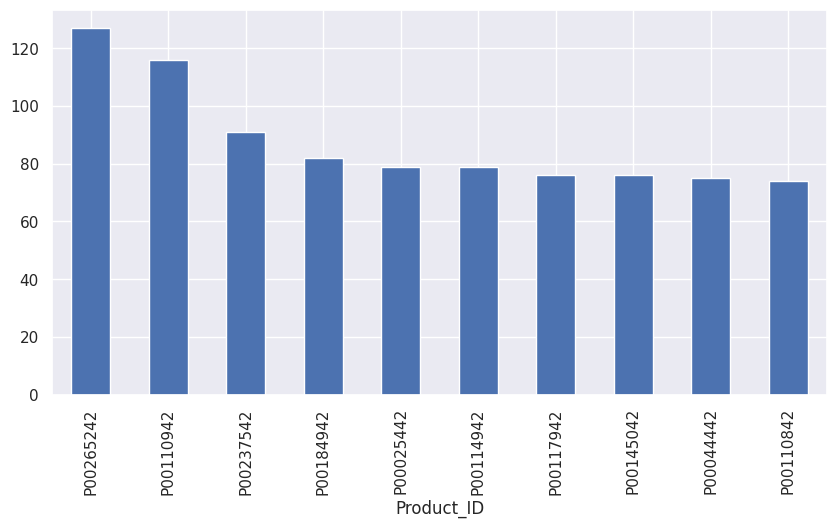

In [37]:
fig1 , ax1 = plt.subplots(figsize = (10,5))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')
sns.set_style("darkgrid")

### 8. Conclusion 

#### Marrried womens from age group 26-35 yeras from UP , Maharashtra & Karnataka who are working in IT , Healthcare , Aviation & more are likely to buy the products from food , clothing & electronic category in the diwali online sales.